# **TFG**  

***Machine Learning-Based Classification of Hospital Discharge Diagnoses Using SNOMED-CT Encoded Health Problems and Clinical Data***  

Cindy Chen

Universitat de Barcelona

2024-2025


In [ ]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
import gradio as gr
import os
from pycaret.classification import *
from pycaret.classification import plot_model
from pycaret.classification import predict_model, pull, load_model

%matplotlib inline

## **Data Importation**

Import Subset 3 to find the best model, train the model, tune it and evaluate.

In [2]:
# Import data
data = pd.read_csv("C:/Users/Cindy Chen/Desktop/TFG/data/04_data/subset_3.csv")
data

,episode_duration,care_level_duration,no_administration_reason_ref,drg_mdc_ref,age,snomed_code,drg_ref,prescription_freq_ref,drg_weight,adm_drug_dose_mean,icd10_capitulo
0,706.924438,706.924438,3.0,11.0,81.0,240131006.0,469.0,10.653915,1.7913,1.2,17
1,287.425842,146.750000,0.0,16.0,47.0,109989006.0,662.0,10.653915,0.9884,100.0,17
2,2222.074951,1703.783569,5.0,7.0,73.0,439740005.0,260.0,10.653915,5.9280,500.0,1
3,1358.753296,433.244171,6.0,6.0,74.0,433146000.0,231.0,10.764504,2.3206,2.0,9
4,1358.753296,481.936676,0.0,6.0,74.0,307496006.0,231.0,10.158386,2.3206,1.0,16
...,...,...,...,...,...,...,...,...,...,...,...
1045979,1842.586670,2.855278,3.0,18.0,67.0,409623005.0,710.0,10.764504,4.4717,100.0,14
1045980,163.000000,94.935280,0.0,7.0,77.0,230690007.0,260.0,10.844777,2.0237,1.0,14
1045981,1512.166626,107.043053,5.0,17.0,45.0,307651005.0,7.0,10.844777,17.9363,1.0,1
1045982,1311.468872,1306.877197,6.0,8.0,54.0,77493009.0,320.0,10.653915,1.3415,2.0,15


Setup the pycaret environment and select the target column, in our case is the 'icd10_capitulo' column. This function also splits the data into training (70%) and testing set (30%). 

In [3]:
# Configuración del entorno de PyCaret
clf = setup(data=data, target='icd10_capitulo', session_id=123, verbose=True)

,Description,Value
0,Session id,123
1,Target,icd10_capitulo
2,Target type,Multiclass
3,Original data shape,"(1045984, 11)"
4,Transformed data shape,"(1045984, 11)"
5,Transformed train set shape,"(732188, 11)"
6,Transformed test set shape,"(313796, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [4]:
# Get preprocessing pipeline
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\CINDYC~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['episode_duration',
                                             'care_level_duration',
                                             'no_administration_reason_ref',
                                             'drg_mdc_ref', 'age',
                                             'snomed_code', 'drg_ref',
                                             'prescription_freq_ref',
                                             'drg_weight',
                                             'adm_drug_dose_mean'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent')))],
         verbose=False)

## **Model Comparison**

Using the ```compare_models``` function to compare the selected models: Logistic Regression, Decision Trees, Random Forest, XGBoost, SVM, KNN and MLP.  

This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. 

In [5]:
# Compare models
model_comparison = compare_models(include=["lr", 'dt', 'rf', 'xgboost', 'svm', 'knn', 'mlp'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.2823,0.8387,0.2823,0.2833,0.2769,0.2107,0.2114,47.2650
rf,Random Forest Classifier,0.2710,0.8038,0.2710,0.2688,0.2688,0.1926,0.1928,67.9220
dt,Decision Tree Classifier,0.2707,0.7866,0.2707,0.2737,0.2693,0.1937,0.1941,1.0420
knn,K Neighbors Classifier,0.2596,0.7178,0.2596,0.2694,0.2608,0.1830,0.1836,3.5880
mlp,MLP Classifier,0.2026,0.5000,0.2026,0.0411,0.0683,0.0000,0.0000,10.3080
lr,Logistic Regression,0.2003,0.0000,0.2003,0.0411,0.0679,-0.0020,-0.0137,109.0110
svm,SVM - Linear Kernel,0.0803,0.0000,0.0803,0.0121,0.0188,0.0001,-0.0002,100.2070


In [6]:
# Save results table
model_comparison_df = pull()
model_comparison_df.to_csv('S3_model_comparison_df.csv', index=False)

# Save best_model
save_model(model_comparison, 'S3_model_comparison')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['episode_duration',
                                              'care_level_duration',
                                              'no_administration_reason_ref',
                                              'drg_mdc_ref', 'age',
                                              'snomed_code', 'drg_ref',
                                              'prescription_freq_ref',
                                              'drg_weight',
                                              'adm_drug_dose_mean'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=N...
                                importance_type=None,
                          

## **Best Model**

Once we have compared the different models, we select the best one. Then using the ```create_model``` function we train and evaluate the performance of the model using cross-validation. By default, it uses the 10 fold. 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2835,0.8390,0.2835,0.2856,0.2783,0.2127,0.2133
1,0.2824,0.8384,0.2824,0.2828,0.2770,0.2110,0.2117
2,0.2825,0.8396,0.2825,0.2824,0.2766,0.2104,0.2111
3,0.2812,0.8393,0.2812,0.2825,0.2759,0.2095,0.2102
4,0.2824,0.8393,0.2824,0.2855,0.2774,0.2114,0.2121
5,0.2835,0.8386,0.2835,0.2852,0.2787,0.2125,0.2132
6,0.2824,0.8384,0.2824,0.2819,0.2757,0.2101,0.2108
7,0.2838,0.8395,0.2838,0.2842,0.2787,0.2115,0.2121
8,0.2798,0.8369,0.2798,0.2800,0.2740,0.2075,0.2081


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

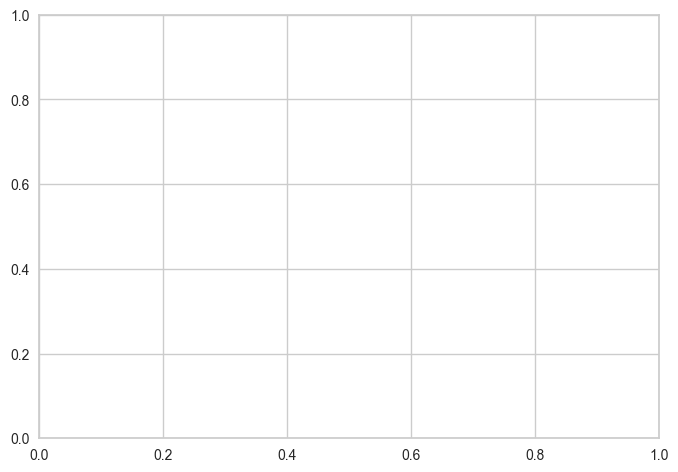

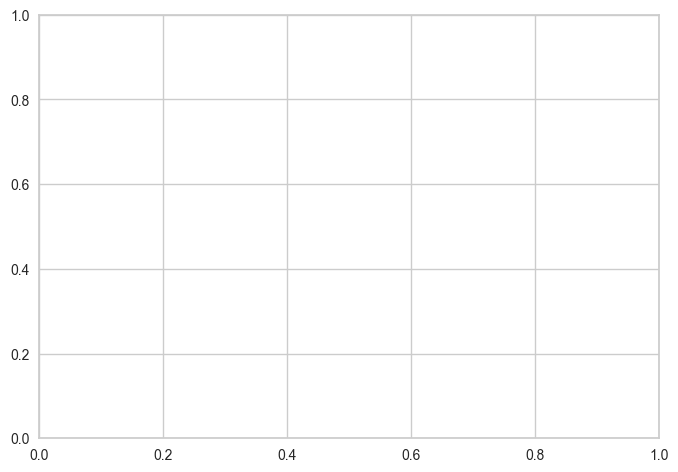

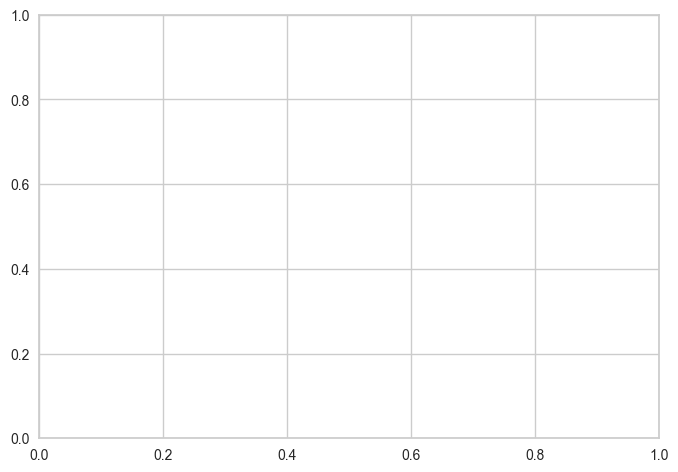

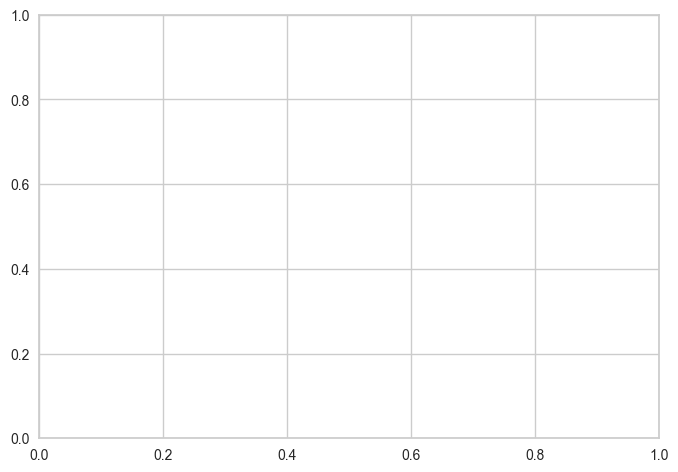

In [7]:
# Model evaluation: cross validation 10 folds
xgboost_model = create_model('xgboost')  
evaluate_model(xgboost_model)

In [8]:
# Save model
save_model(xgboost_model, 'S3_best_model_xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['episode_duration',
                                              'care_level_duration',
                                              'no_administration_reason_ref',
                                              'drg_mdc_ref', 'age',
                                              'snomed_code', 'drg_ref',
                                              'prescription_freq_ref',
                                              'drg_weight',
                                              'adm_drug_dose_mean'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=N...
                                importance_type=None,
                          

In [4]:
# Load model
xgboost_model = load_model("C:/Users/Cindy Chen/Desktop/TFG/plots/04/S3/S3_best_model_xgboost")

Transformation Pipeline and Model Successfully Loaded


## **Optimize and Tune Model**

The ```tune_model``` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold.  

By default, it uses RandomGridSearch from the sklearn and the number of iterations (n_iter) is set to 10.

In [ ]:
# Optimize and tune model using Random Grid Search 
xgboost_model_tuned = tune_model(xgboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Macro Precision
Fold,,,,,,,,
0,0.2884,0.8400,0.2884,0.2890,0.2835,0.2164,0.2171,0.0000
1,0.2887,0.8396,0.2887,0.2898,0.2841,0.2173,0.2181,0.0000
2,0.2880,0.8409,0.2880,0.2894,0.2829,0.2164,0.2172,0.0000
3,0.2869,0.8401,0.2869,0.2882,0.2819,0.2149,0.2156,0.0000
4,0.2885,0.8407,0.2885,0.2907,0.2839,0.2170,0.2178,0.0000
5,0.2862,0.8394,0.2862,0.2883,0.2817,0.2147,0.2155,0.0000
6,0.2870,0.8395,0.2870,0.2882,0.2822,0.2149,0.2156,0.0000
7,0.2884,0.8406,0.2884,0.2891,0.2836,0.2163,0.2170,0.0000
8,0.2847,0.8378,0.2847,0.2860,0.2796,0.2126,0.2134,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Hyperparameters after tunning
print(xgboost_model_tuned)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=290, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


As we can see, there's a little bit of improvement, let's customise the grid and parameters using custom_grid.  

For xgboost, the hyperparameters decided to use are:
- learning_rate
- max_depth
- n_estimators

Since the previous tuned model has improvements, we decided to keep the values for colsample_bytree and min_child_weight of the previously tuned model.

In [ ]:
# Optimize and tune model using custom grid and Random Grid Search
params = {'colsample_bytree': [0.9],
          'learning_rate': [0.01, 0.1, 0.15],
          'max_depth': [None, 5, 7, 10],
          'min_child_weight': [3],
          'n_estimators': [100, 290, 300]
} 

xgboost_model_tuned_2 = tune_model(xgboost_model, custom_grid=params) # chose_better=False

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2885,0.8395,0.2885,0.2898,0.2843,0.2165,0.2171
1,0.2870,0.8392,0.2870,0.2887,0.2829,0.2149,0.2155
2,0.2885,0.8403,0.2885,0.2889,0.2836,0.2160,0.2167
3,0.2871,0.8394,0.2871,0.2880,0.2824,0.2144,0.2151
4,0.2878,0.8398,0.2878,0.2893,0.2832,0.2160,0.2167
5,0.2872,0.8389,0.2872,0.2887,0.2828,0.2151,0.2158
6,0.2891,0.8393,0.2891,0.2913,0.2850,0.2172,0.2179
7,0.2869,0.8400,0.2869,0.2887,0.2829,0.2148,0.2155
8,0.2849,0.8373,0.2849,0.2859,0.2803,0.2123,0.2130


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Save tuned model
save_model(xgboost_model_tuned_2, 'S3_best_model_xgboost_tuned_2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['episode_duration',
                                              'care_level_duration',
                                              'no_administration_reason_ref',
                                              'drg_mdc_ref', 'age',
                                              'snomed_code', 'drg_ref',
                                              'prescription_freq_ref',
                                              'drg_weight',
                                              'adm_drug_dose_mean'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=N...
                                importance_type=None,
                          

In [ ]:
# Optimize and tune model using custom grid and GridSearchCV
params = {'colsample_bytree': [0.9],
          'learning_rate': [0.01, 0.1, 0.15],
          'max_depth': [None, 3, 5, 7, 10],
          'min_child_weight': [3],
          'n_estimators': [100, 290, 300]
} 

xgboost_model_tuned_3 = tune_model(xgboost_model, custom_grid=params, search_library='scikit-learn', search_algorithm='grid', choose_better=False)

In [ ]:
# Save tuned model
save_model(xgboost_model_tuned_3, 'S3_best_model_xgboost_tuned_3')

As we can see, the first tuned model is the one that has more improvements, so we'll use that one.

In [7]:
# Load tuned model
xgboost_model_tuned = load_model("C:/Users/Cindy Chen/Desktop/TFG/plots/04/S3/S3_best_model_xgboost_tuned")

Transformation Pipeline and Model Successfully Loaded


In [31]:
# Hyperparameters before tunning
print(xgboost_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [10]:
print(xgboost_model_tuned.get_params())

{'memory': FastMemory(location=C:\Users\CINDYC~1\AppData\Local\Temp\joblib), 'steps': [('numerical_imputer', TransformerWrapper(exclude=None,
                   include=['episode_duration', 'care_level_duration',
                            'no_administration_reason_ref', 'drg_mdc_ref',
                            'age', 'snomed_code', 'drg_ref',
                            'prescription_freq_ref', 'drg_weight',
                            'adm_drug_dose_mean'],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             keep_empty_features=False,
                                             missing_values=nan,
                                             strategy='mean'))), ('categorical_imputer', TransformerWrapper(exclude=None, include=[],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             f

In this case, the hyperparameter that changed from the original model are: colsample_bytree, learning_rate, max_depth, min_child_weight and n_estimators.

## **Predictions**

Using the ```predict_model``` function, we can predicts the performance of the model on the test set. 

In [11]:
# Predict on the test set
predict_model(xgboost_model_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.2879,0.8398,0.2879,0.2901,0.2834,0.2164,0.2171


,episode_duration,care_level_duration,no_administration_reason_ref,drg_mdc_ref,age,snomed_code,drg_ref,prescription_freq_ref,drg_weight,adm_drug_dose_mean,icd10_capitulo,prediction_label,prediction_score
218191,1358.753296,181.709442,0.0,6.0,74.0,6.540401e+07,231.0,10.653914,2.3206,1.0,1,14,0.1829
863976,1651.416626,789.266663,5.0,7.0,79.0,6.004601e+07,260.0,10.653914,5.9280,100.0,12,12,0.5043
961023,355.107513,219.366394,0.0,9.0,56.0,9.532600e+07,385.0,10.764503,0.5537,100.0,14,14,0.9989
916955,116.547226,46.750000,5.0,21.0,51.0,1.162900e+08,793.0,10.844776,0.9261,100.0,14,14,0.4050
1013913,1358.753296,481.936676,0.0,6.0,74.0,2.147484e+09,231.0,10.764503,2.3206,5.0,16,16,0.2080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842210,1401.687744,937.500000,5.0,7.0,41.0,1.392001e+07,284.0,10.653914,2.0301,100.0,14,17,0.1618
999667,1512.166626,116.433334,0.0,17.0,45.0,8.238501e+07,7.0,10.653914,17.9363,495.0,14,1,0.1879
323441,1358.753296,481.936676,0.0,6.0,74.0,3.074960e+08,231.0,10.764503,2.3206,2.0,1,15,0.2012
882856,2222.074951,29.608889,6.0,7.0,73.0,3.121040e+08,260.0,10.844776,5.9280,2.0,15,19,0.1732


In [12]:
# Get the performance metrics
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.2879,0.8398,0.2879,0.2901,0.2834,0.2164,0.2171


## **Analyse Model**  

Plots to analyse the performance of the model on the test set.

### **Confusion Matrix**

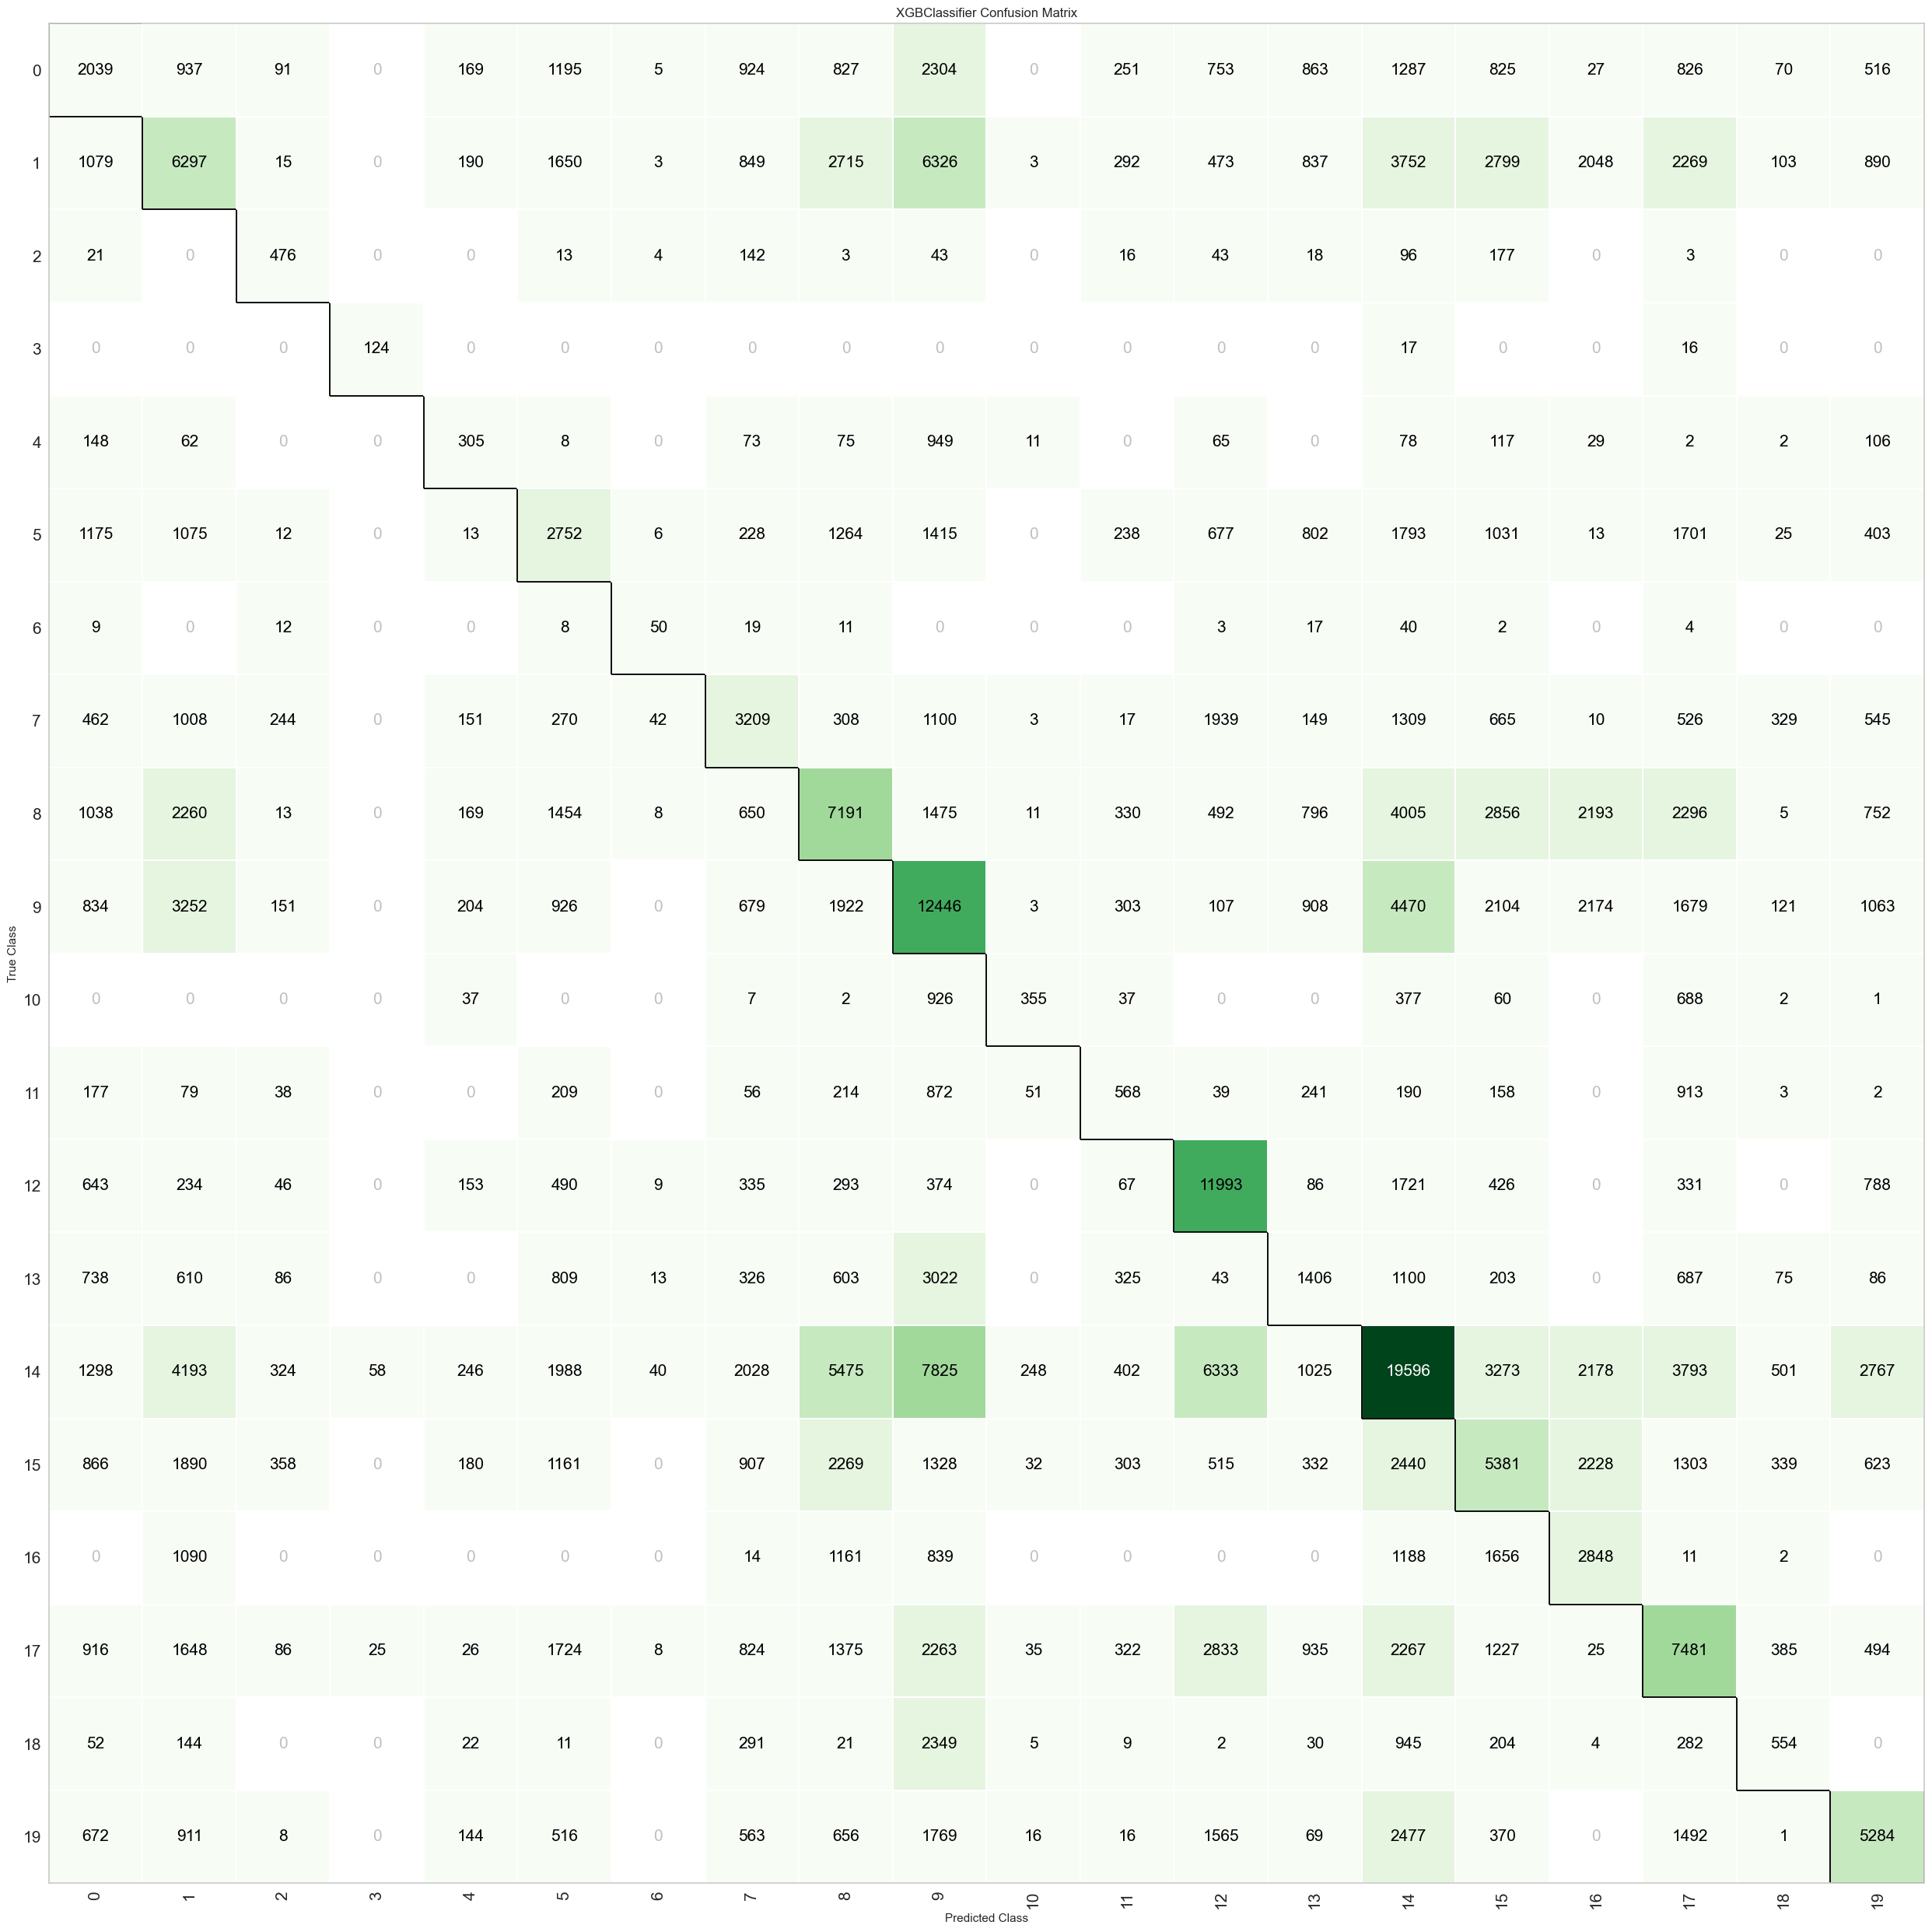

In [13]:
# Confusion Matrix
plt.figure(figsize=(25, 25))
plot_model(xgboost_model_tuned, plot = 'confusion_matrix') # save=True, use_train_data=False

### **Area Under the Curve (AUC)**

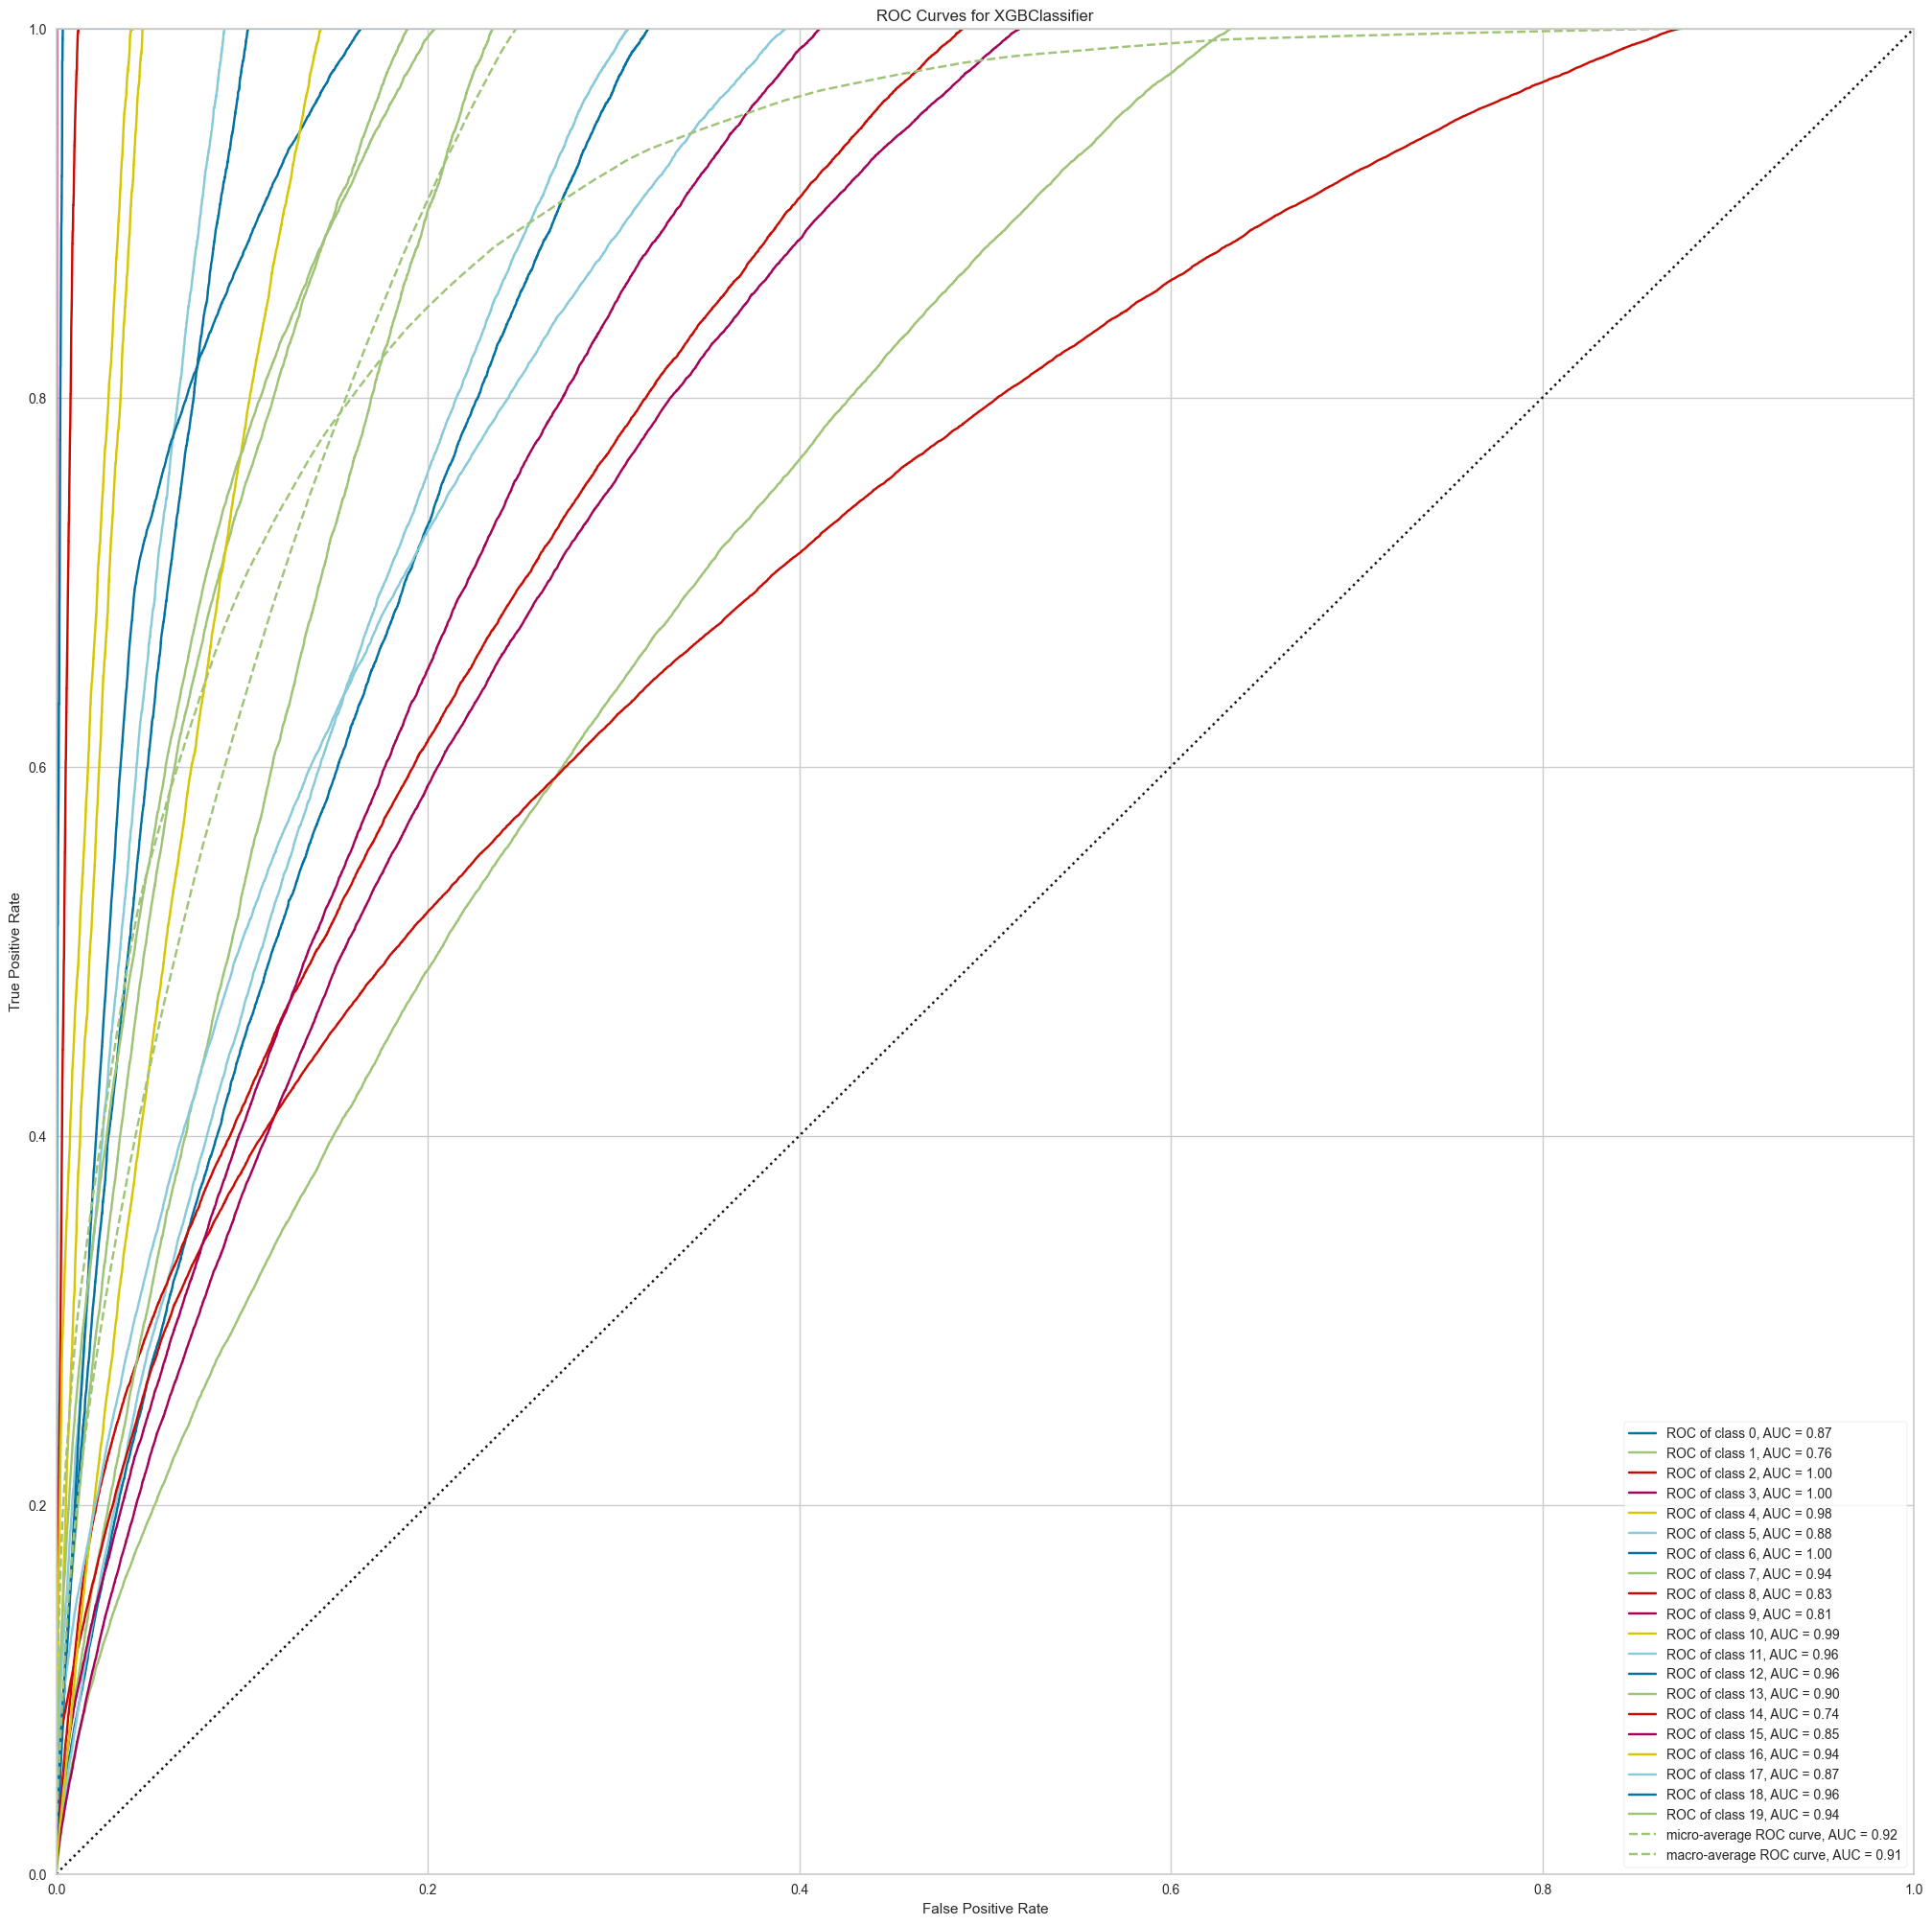

In [14]:
# Area Under the Curve (AUC)
plt.figure(figsize=(25, 25))
plot_model(xgboost_model_tuned, plot = 'auc') # save=True

### **Class Prediction Error**

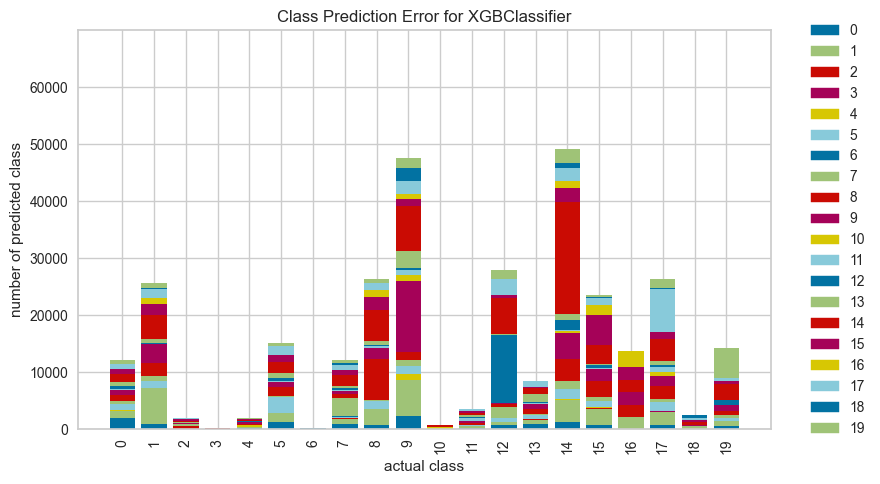

In [15]:
# Class Prediction Error
plt.figure(figsize=(10, 5))
plot_model(xgboost_model_tuned, plot = 'error') # save=True

### **Classification Report**

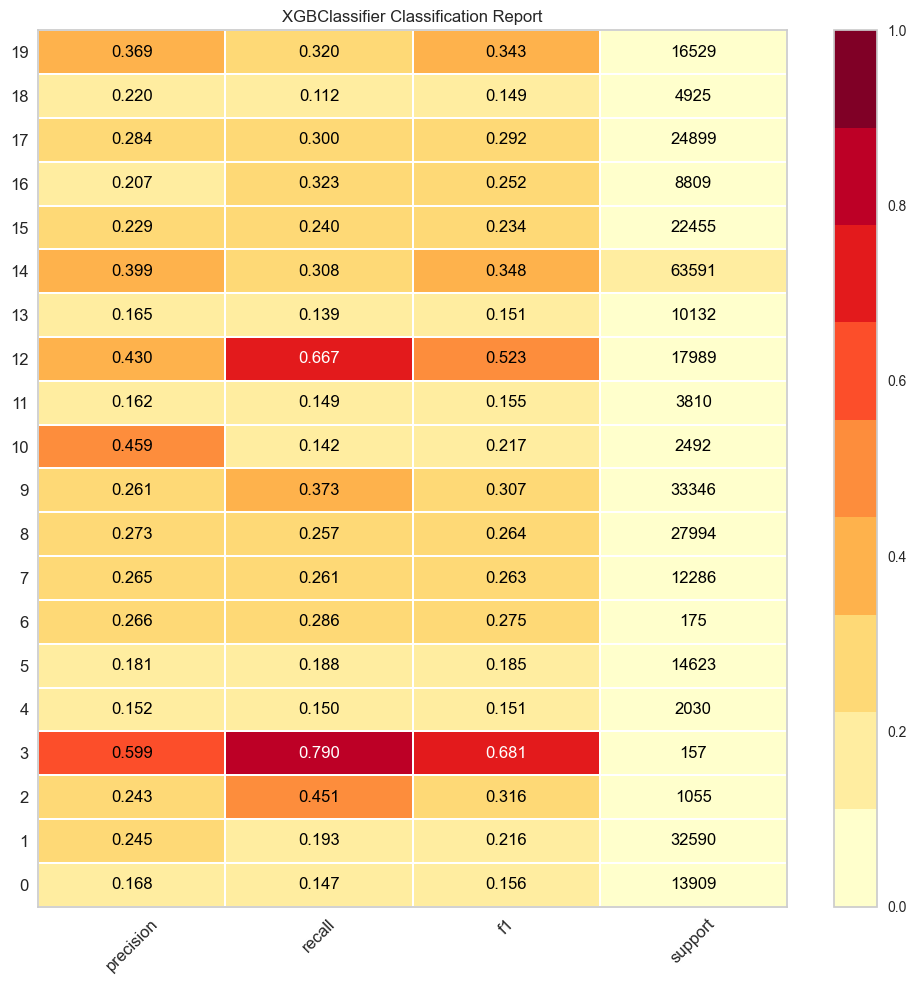

In [16]:
# Classification Report
plt.figure(figsize=(10, 10))
plot_model(xgboost_model_tuned, plot = 'class_report') # save=True